In [1]:
import numpy as np
import matplotlib.pyplot as plt
from methods import *

##### In this notebook we will replicate Figure 3. from *Guéant O., Lehalle CA., Fernandez Tapia J. (2012)*

Set model parameters

In [2]:
T = 300  # 5 minutes in seconds
N = 500
dt = T / N
time_grid = np.linspace(T, 0, N+1)  # backward from T to 0

q_max = 6
b = 3.0
A = 0.1
k = 0.3
gamma = 0.05
mu = 0.0
sigma = 0.3

alpha = 0.5 * k * gamma * sigma**2
beta = k * mu
eta = A * (1+ gamma/k)**(-(1+ k/gamma))

Compute optimal quotes

In [3]:
optimal_quotes = compute_optimal_quote(q_max,N,k,b,alpha,beta,gamma,eta,dt)

Monte Carlo simulation to get the trading curve (defined as the average number of shares at each point)

In [4]:
M = 10**4
q_init = 6
S_init = 100 # initial price (large enough so that our price doesn't go negative in the simulation period, since the authors use a brownian motion that has a positive probability of being negative)

q_paths, S_paths, X_paths = simulate_trading_paths(M, N, dt, q_init, S_init, mu, sigma, k, gamma, optimal_quotes, A, b)

# compute average inventory over time
avg_q = np.mean(q_paths, axis=1)

Plot the trading curve (expected q_t)

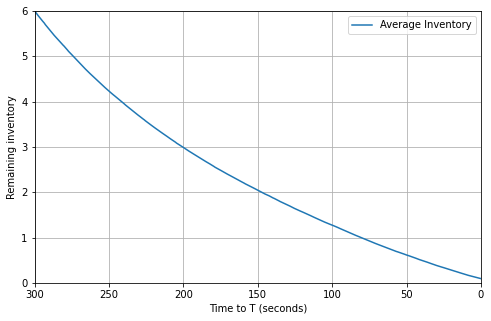

In [5]:
plt.figure(figsize=(8,5))
plt.plot(time_grid, avg_q, label='Average Inventory')
plt.xlabel("Time to T (seconds)")
plt.ylabel("Remaining inventory")
# plt.title("Figure 3: Trading curve for q=6 over 5 minutes")
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.xlim((T,0))
plt.ylim((0,q_max))
plt.savefig("Figures/Figure_3_trading_curve.png")

Since b = 3, the trader has a weak incentive to liquidate strictly before time T and there are cases for which liquidation is not complete before time T. This is the reason why we do not have $\mathbb{E}[q_T]$ = 0 on the above figure.

We also can plot a sample path

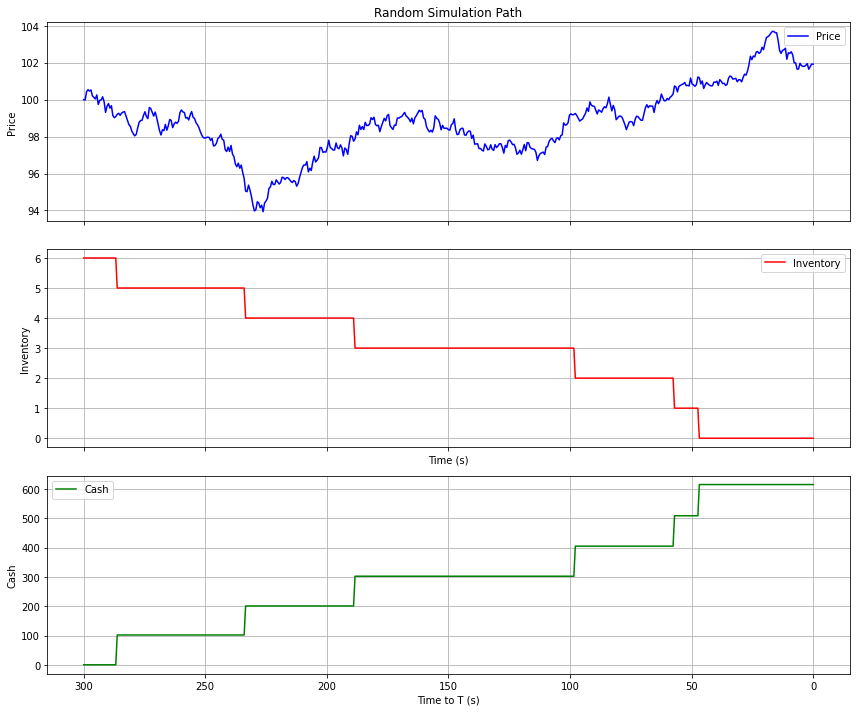

In [6]:
rand_idx = np.random.randint(0, M)
q_rand = q_paths[:, rand_idx]
S_rand = S_paths[:, rand_idx]
X_rand = X_paths[:, rand_idx]

# Create subplots: one for price and one for inventory
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plot price path on the first axis
ax1.plot(time_grid, S_rand, color='blue', label='Price')
ax1.set_ylabel('Price')
ax1.set_title('Random Simulation Path')
ax1.legend()
ax1.grid(True)

# Plot inventory path on the second axis
ax2.plot(time_grid, q_rand, color='red', label='Inventory')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Inventory')
ax2.legend()
ax2.grid(True)

# Plot cash path on the third axis
ax3.plot(time_grid, X_rand, color='green', label='Cash')
ax3.set_xlabel('Time to T (s)')
ax3.set_ylabel('Cash')
ax3.legend()
ax3.grid(True)

plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()
